In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
from pathlib import Path
from matplotlib import pyplot as plt
from collections import Counter
import stanza
import networkx as nx

In [2]:
dataset_dir = Path('Dataset')
train_set_file = dataset_dir / "training_set_rel3.tsv"

In [3]:
train_df = pd.read_csv(train_set_file, delimiter='\t', header=0, encoding='ISO-8859-1')
train_df.head(2)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
stanza.download('en')
nlp = stanza.Pipeline('en', processors = "tokenize,mwt,pos,lemma,depparse")

2021-10-14 11:51:23 INFO: Downloading default packages for language: en (English)...


2021-10-14 11:51:24 INFO: File exists: /home/kayhoss/stanza_resources/en/default.zip.
2021-10-14 11:51:26 INFO: Finished downloading models and saved to /home/kayhoss/stanza_resources.
2021-10-14 11:51:26 WARNING: Can not find mwt: default from official model list. Ignoring it.
2021-10-14 11:51:26 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |
| depparse  | combined |

2021-10-14 11:51:26 INFO: Use device: gpu
2021-10-14 11:51:26 INFO: Loading: tokenize
2021-10-14 11:51:28 INFO: Loading: pos
2021-10-14 11:51:28 INFO: Loading: lemma
2021-10-14 11:51:28 INFO: Loading: depparse
2021-10-14 11:51:28 INFO: Done loading processors!


In [5]:
train_df.iloc[0]['essay']

"Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the econom

In [175]:
# sample_text = 'Deemed universities charge huge fees'
text = train_df.iloc[0]['essay']
doc = nlp(text)

In [193]:
parsed = doc.sentences[0].to_dict()

In [194]:
MG = nx.MultiDiGraph()

In [195]:
MG.add_nodes_from([p['text'] for p in parsed])

In [196]:
for token in parsed:
    text_self = token['text']
    text_nxt = parsed[token['head'] -1]['text']
    relation = token['deprel']
    MG.add_edge(text_self, text_nxt, label= relation)

/home/kayhoss/miniconda3/envs/graph/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/kayhoss/miniconda3/envs/graph/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


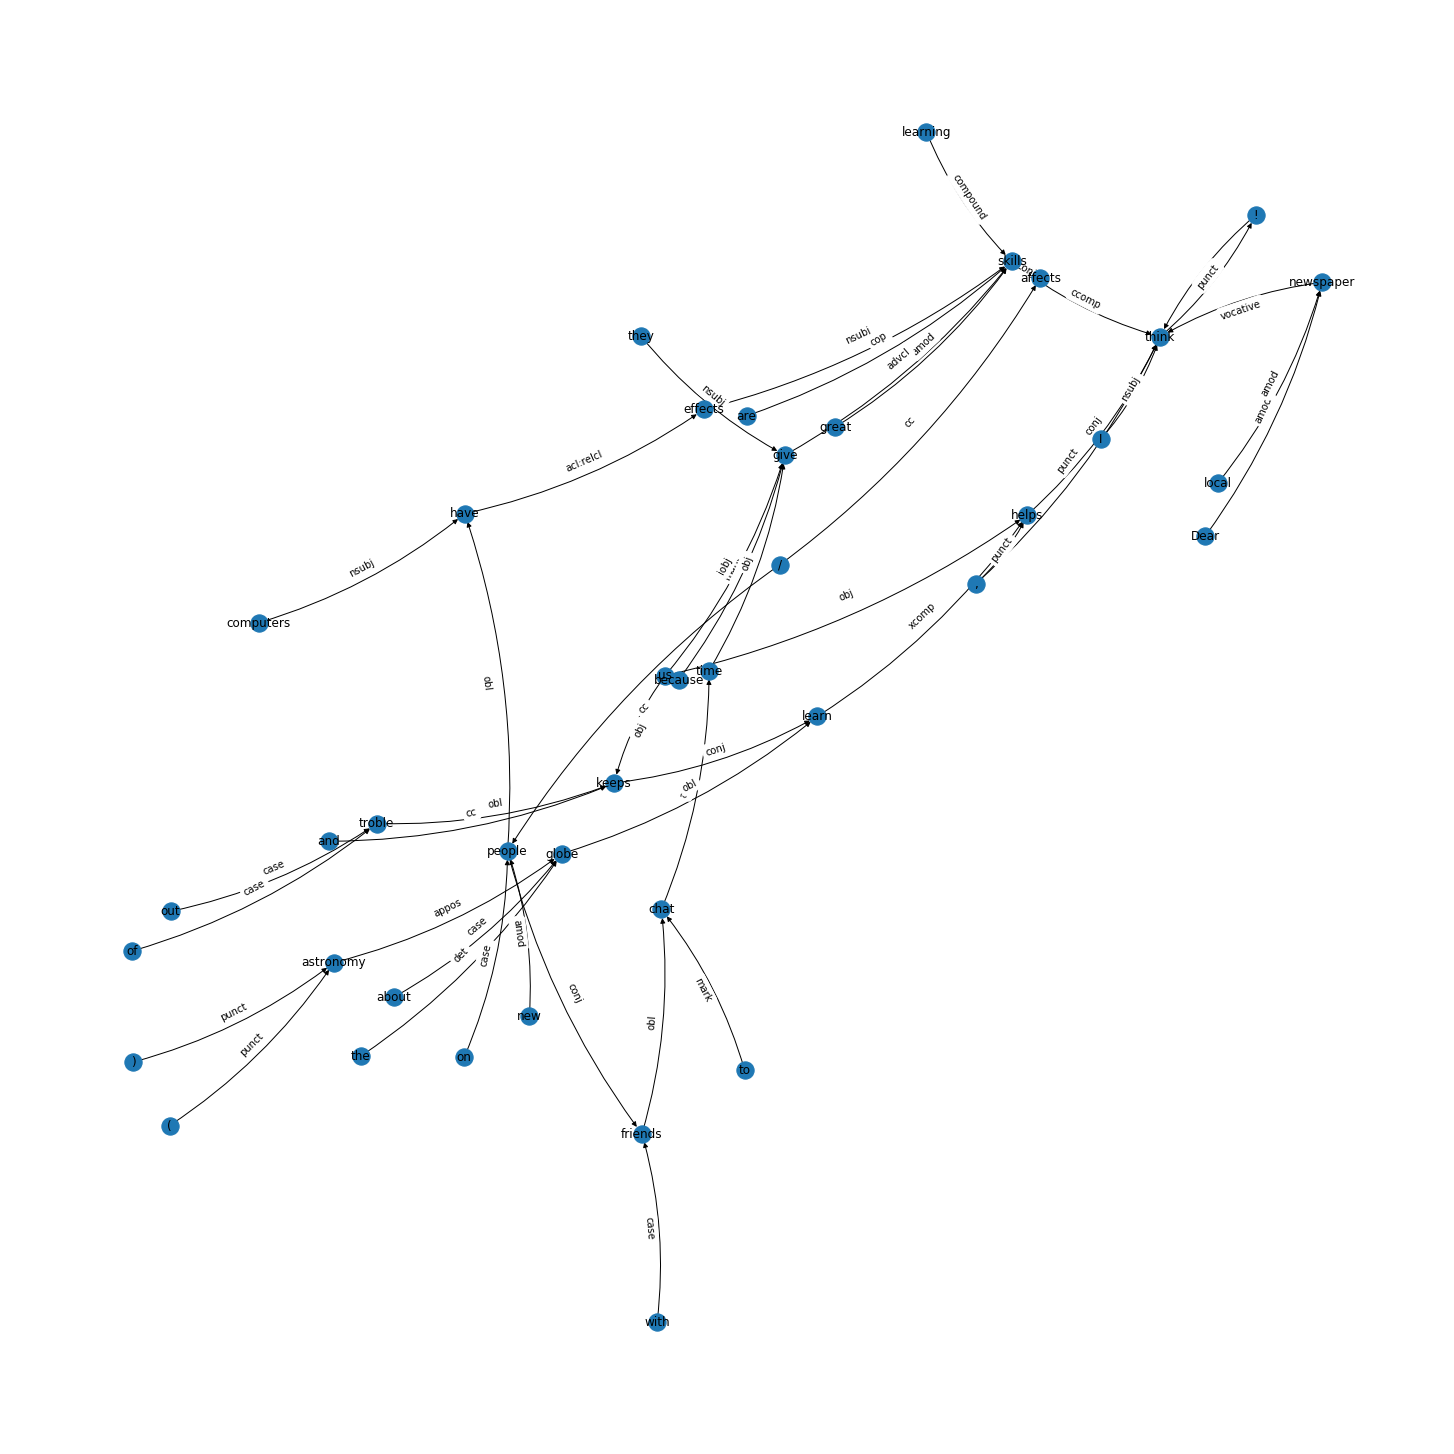

In [198]:
fig = plt.figure(figsize=(20, 20))
pos = nx.spring_layout(MG)
edge_labels = dict([((n1, n2), d['label']) for n1, n2, d in MG.edges(data=True)])
nx.draw(MG, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
nx.draw_networkx_edge_labels(MG, pos, edge_labels=edge_labels)
plt.savefig("test.pdf", dpi=(1000), bbox_inches='tight', format='pdf')